<a href="https://colab.research.google.com/github/Manjari2605/telecom_churn_prediction/blob/main/Telecomeretention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/1730285168-TelecomCustomerChurn.csv")

In [5]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


<ipython-input-6-1641911321>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


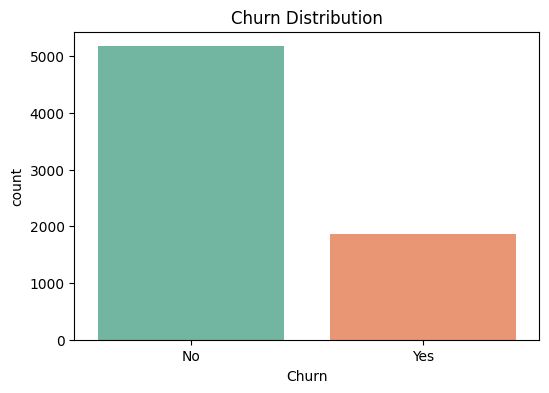

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.show()


In [7]:
df.shape

(7043, 21)

In [8]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


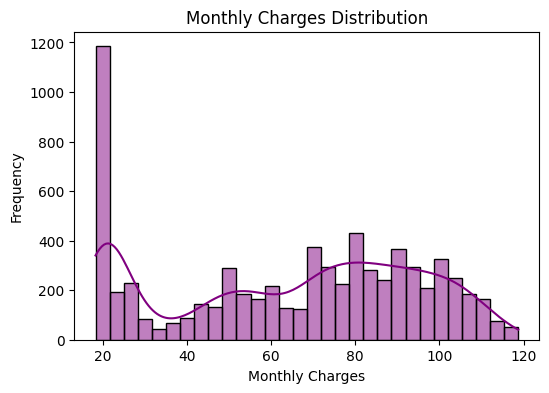

In [11]:
if "MonthlyCharges" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="purple")
    plt.title("Monthly Charges Distribution")
    plt.xlabel("Monthly Charges")
    plt.ylabel("Frequency")
    plt.show()


In [12]:
df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
list(df.columns)

['customerID',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [15]:
Y=df["Churn"]
X=df.drop("Churn",axis=1)

In [16]:
X.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65


In [17]:
Y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [18]:
Y.value_counts()

,count
Churn,
No,5174
Yes,1869


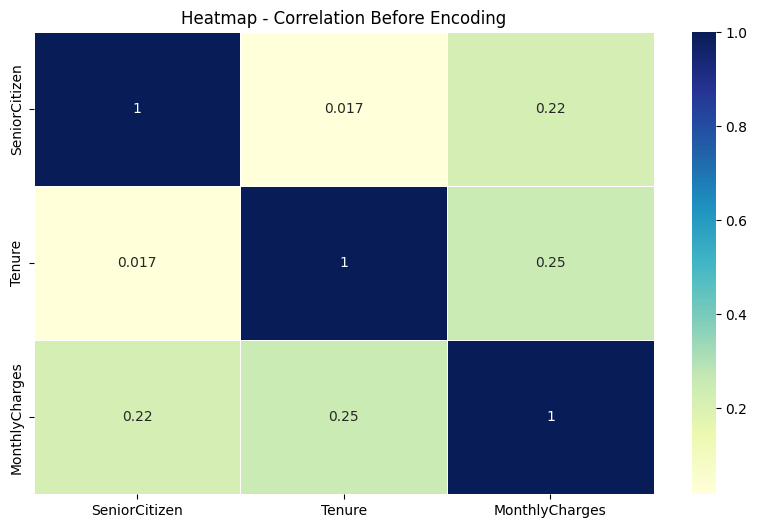

In [19]:
plt.figure(figsize=(10, 6))
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap - Correlation Before Encoding")
plt.show()



In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros=RandomOverSampler()

In [22]:
X,Y=ros.fit_resample(X,Y)

In [23]:
X.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65


In [24]:
Y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
10343,Yes
10344,Yes
10345,Yes
10346,Yes


In [25]:
Y.value_counts()

,count
Churn,
No,5174
Yes,5174


In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
X=oe.fit_transform(X)

In [27]:
X

array([[5.375e+03, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.420e+02,
        2.505e+03],
       [3.962e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 4.980e+02,
        1.466e+03],
       [2.564e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 4.360e+02,
        1.570e+02],
       ...,
       [6.480e+02, 0.000e+00, 0.000e+00, ..., 2.000e+00, 9.060e+02,
        4.400e+03],
       [1.756e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 7.190e+02,
        2.012e+03],
       [3.854e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 1.309e+03,
        2.100e+01]])

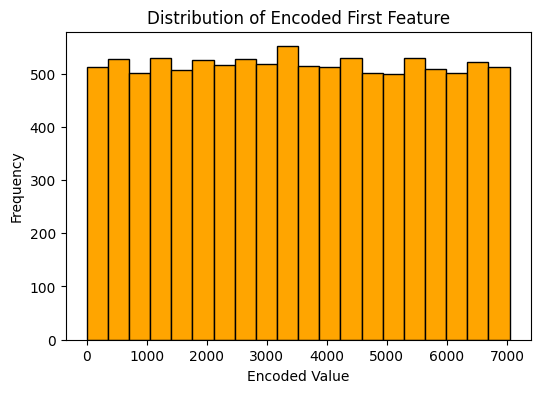

In [28]:
plt.figure(figsize=(6, 4))
plt.hist(X[:, 0], bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Encoded First Feature")
plt.xlabel("Encoded Value")
plt.ylabel("Frequency")
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2529)


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [31]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
Y_pred=rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          No       0.96      0.80      0.87      1290
         Yes       0.83      0.96      0.89      1297

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587

